> #### Setup  

> Before running data.world notebooks for the first time, you'll need to:  
1. Install data.world's Python package, including optional `pandas` dependencies: 
```shell
pip install git+git://github.com/datadotworld/data.world-py.git#egg=project[pandas]
```
1. Obtain an API access token at https://data.world/settings/advanced
1. Store API access token using the `dw` command-line tool: 
```shell
dw configure
```

> Once your environment is set up, these steps do not need to be repeated for other data.world notebooks.

In [1]:
import datadotworld as dw
import charts_function_list
import os
import math

In [2]:
base_, data, outputs = charts_function_list.folder_setup()

In [3]:
# Datasets are referenced by their path
dataset_key = 'len/intelligence-of-dogs'

# Or simply by their URL
dataset_key = 'https://data.world/len/intelligence-of-dogs'

In [4]:
# Load dataset (onto the local file system)
dogs = dw.load_dataset(dataset_key)  # cached under ~/.dw/cache

In [5]:
#pull in tables and create DataFrame
dog_frame = pd.DataFrame(dogs.tables['dog_intelligence']) #create data frame from dog intelligence table
dog_frame.index = dog_frame.index+1 #add one to index
dog_frame.fillna({'obey':.25},inplace=True)#data source suggests the NA should be .25. Fill with that
dog_frame['obey']=dog_frame['obey'].astype('float')

In [11]:
dog_frame

,breed,classification,obey,reps_lower,reps_upper
1,Border Collie,Brightest Dogs,0.95,1,4
2,Poodle,Brightest Dogs,0.95,1,4
3,German Shepherd,Brightest Dogs,0.95,1,4
4,Golden Retriever,Brightest Dogs,0.95,1,4
5,Doberman Pinscher,Brightest Dogs,0.95,1,4
6,Shetland Sheepdog,Brightest Dogs,0.95,1,4
7,Labrador Retriever,Brightest Dogs,0.95,1,4
8,Papillon,Brightest Dogs,0.95,1,4
9,Rottweiler,Brightest Dogs,0.95,1,4
10,Australian Cattle Dog,Brightest Dogs,0.95,1,4


In [8]:
#separate group for terriers and not terriers
terriers = dog_frame[(dog_frame['breed'].str.lower().str.contains('terrier'))|(dog_frame['breed']=='Miniature Schnauzer')]
not_terrier = dog_frame[~(dog_frame['breed'].str.lower().str.contains('terrier'))&(dog_frame['breed']!='Miniature Schnauzer')]

In [18]:
terrier_color = '#f03b20' #color for terrier charts
alt_font = 'Futura Bk BT' #font to use for titles
less_than_eq = u"\u2264"
greater_than_eq = u"\u2265"

classifications = np.delete(dog_frame['classification'].unique(),-1) #list of classifications minus the lowest intelligence one

#function to create bar graphs
def dog_bars(df,color,zorder=1,alpha=.9):
    return ax.bar(left = df.index+.5,bottom = df.reps_lower,height=(df.reps_upper-df.reps_lower),alpha=alpha,width=.5,color=color,edgecolor='white',linewidth=.1,zorder=zorder,clip_on=False)

#function for obey% labels
def obey_label(category,string_piece = greater_than_eq,adjustment_factor=0 ):
    by_classification = dog_frame[dog_frame['classification']==category]
    x_pos =  np.mean([by_classification.index.max(),by_classification.index.min()])
    y_pos = (by_classification['reps_lower'].min()-1.5)+adjustment_factor
    label = 'Obeys first command\n'+string_piece+str(int((by_classification['obey'].min()*100)))+'% of the time'
    return ax.text(x_pos,y_pos,label,ha='center',va='center',fontname='Futura Md BT',color='#3182bd')



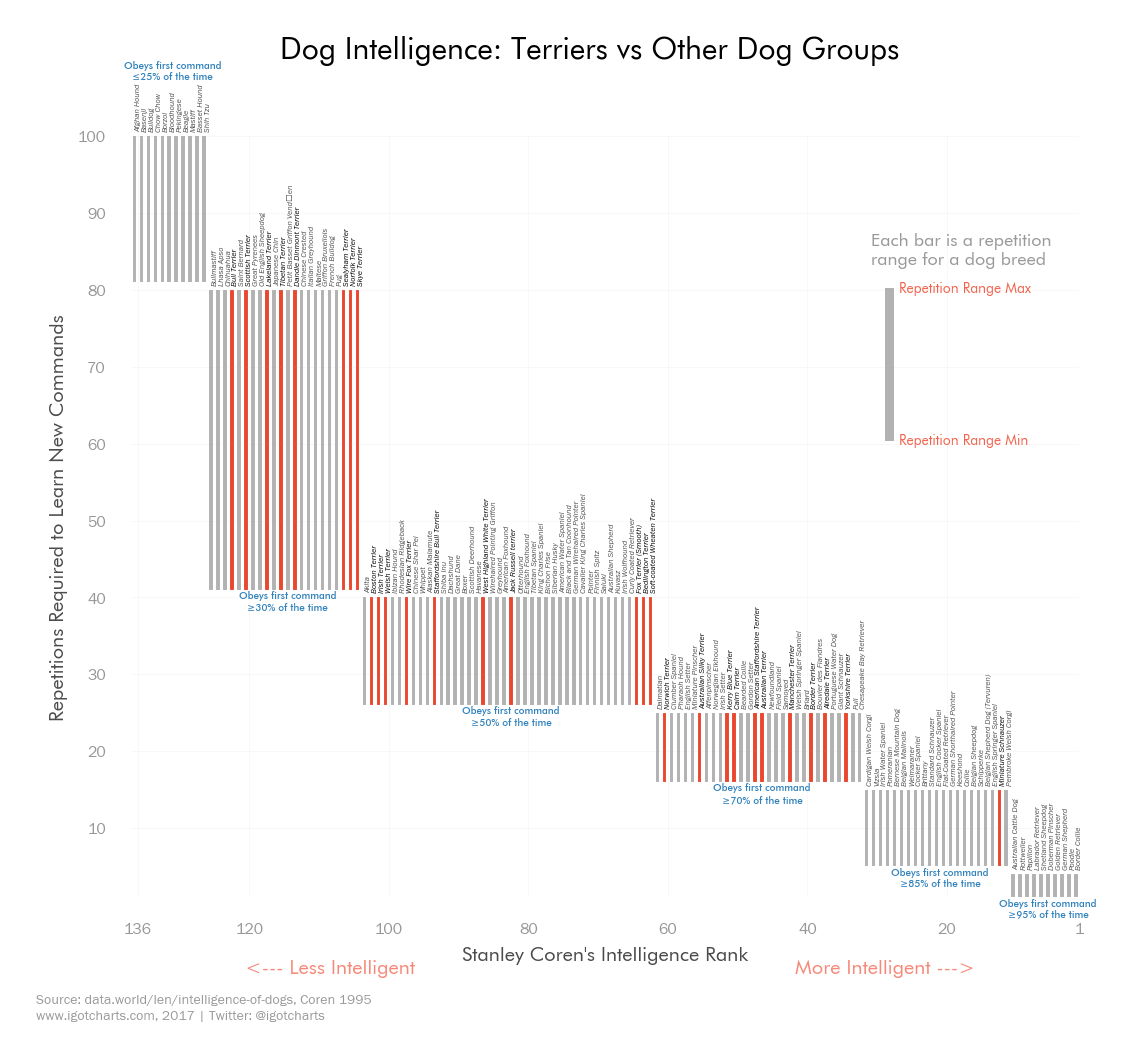

In [20]:
os.chdir(outputs)

dog_chart = charts_function_list.chart_maker(title ='Dog Intelligence: Terriers vs Other Dog Groups')
fig = dog_chart.initial_fig_axis(figsize=(17,14))
fig.suptitle(dog_chart.title,fontsize=30,fontname='Futura Bk BT')
ax = dog_chart.axes_set_up(fig)
dog_bars(dog_frame,'grey',alpha=.6)

dog_bars(terriers,terrier_color)

for item in terriers.index:
    ax.text(item,terriers.loc[item]['reps_upper']+.6,terriers.loc[item]['breed'],rotation=90,va='bottom',ha='center',style='italic',fontsize=8)

for item in not_terrier.index:
    ax.text(item,not_terrier.loc[item]['reps_upper']+.6,not_terrier.loc[item]['breed'],rotation=90,va='bottom',ha='center',style='italic',fontsize=8,alpha=.7)
    
ax.set_xticks([1]+[(20*x) for x in range (1,math.ceil(len(dog_frame)/20))]+[len(dog_frame)])
ax.set_xlim(1,137)
ax.set_ylabel('Repetitions Required to Learn New Commands',fontname = 'Futura Bk BT',fontsize=20,alpha=.7)
ax.set_xlabel('Stanley Coren\'s Intelligence Rank',fontname = alt_font,fontsize=20,alpha=.7)
ax.invert_xaxis()
ax.text(.3,-.1,'<--- Less Intelligent',transform=ax.transAxes,fontname = alt_font,fontsize=20,alpha=.6,ha='right',color='#f03b20')
ax.text(.7,-.1,'More Intelligent --->',transform=ax.transAxes,fontname = alt_font,fontsize=20,alpha=.6,ha='left',color='#f03b20')
dog_chart.tick_params_(ax,pad=25)
dog_chart.y_axis_setup(ax,1,100,interval=10)

#legend
ax.text(.78,.85,'Each bar is a repetition\nrange for a dog breed', transform=ax.transAxes,color='grey',alpha=.8,va='center',fontsize=18,fontname = alt_font)
ax.bar(left=.8,bottom=.6,height=.2, transform=ax.transAxes,width=.01,color='grey',alpha=.6)
ax.text(.81,.6,'Repetition Range Min', transform=ax.transAxes,color=terrier_color,alpha=.8,va='center',fontsize=14,fontname = alt_font)
ax.text(.81,.8,'Repetition Range Max', transform=ax.transAxes,color=terrier_color,alpha=.8,va='center',fontsize=14,fontname = alt_font)
for item in classifications:
    obey_label(item)
obey_label('Lowest Degree of Working/Obedience Intelligence',less_than_eq,adjustment_factor=29)
dog_chart.citations(ax,x=-.1,source_y=-.14,chart_tag_y=-.16,source = 'Source: data.world/len/intelligence-of-dogs, Coren 1995',chart_tag='www.igotcharts.com, 2017 | Twitter: @igotcharts')
charts_function_list.chart_save('dog_intelligence',dpi=300)
plt.show()

In [ ]:
#sql method
dog_frame = dw.query(dataset_key, 'SELECT * FROM dog_intelligence').dataframe